In [1]:
!pip install --upgrade gensim numpy scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled ge

In [2]:
!pip install pandas
%matplotlib inline

In [3]:
!pip install nltk scikit-learn tensorflow

In [ ]:
# ✅ Force compatible versions
!pip install -U numpy==1.26.4 scipy gensim --quiet
import os
os.kill(os.getpid(), 9)  # 🔁 Force restart so versions reload cleanly


In [1]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/truevsfakenews.csv")

In [4]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [6]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\@\w+|\#", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply cleaning
df["cleaned_text"] = df["text"].apply(clean_text)

In [7]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["cleaned_text"])
sequences = tokenizer.texts_to_sequences(df["cleaned_text"])
word_index = tokenizer.word_index

In [8]:
# Padding based on 95th percentile length
seq_lengths = [len(seq) for seq in sequences]
max_len = int(np.percentile(seq_lengths, 95))
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post")

In [9]:
# Encode labels
label_map = {"true": 1, "fake": 0}
labels = df["label"].map(label_map).values

In [10]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [11]:
print("Preprocessing done!")
print(f"Max sequence length (95th percentile): {max_len}")
print(f"Vocabulary size: {len(word_index)}")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Preprocessing done!
Max sequence length (95th percentile): 496
Vocabulary size: 122082
Training samples: 16000, Testing samples: 4000


In [12]:
!pip install wordcloud

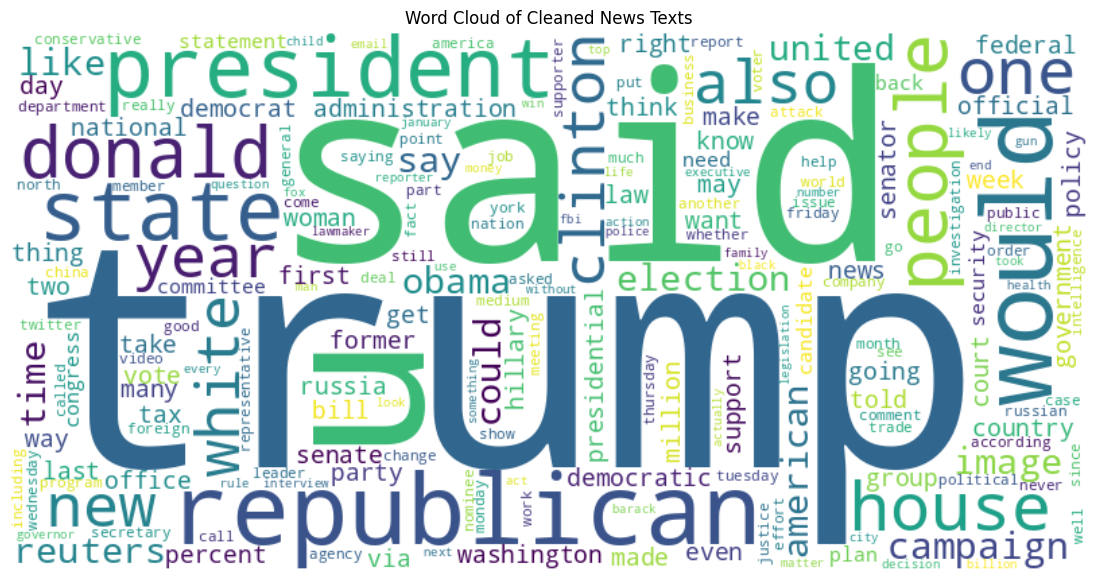

[('trump', 97596), ('said', 61119), ('u', 35046), ('republican', 30221), ('would', 30208), ('president', 29301), ('state', 28381), ('people', 20885), ('donald', 20263), ('house', 18812), ('one', 18021), ('new', 14965), ('also', 14841), ('year', 14717), ('clinton', 14623), ('white', 14584), ('campaign', 14078), ('time', 13353), ('image', 12987), ('reuters', 12694)]


In [13]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word frequencies
word_freq = Counter(" ".join(df['cleaned_text']).split())

# Plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cleaned News Texts")
plt.show()

# Print the 20 most common words
print(word_freq.most_common(20))

In [ ]:
Model Building (Simple RNN)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 114s 440ms/step - accuracy: 0.5456 - loss: 0.6874 - val_accuracy: 0.7110 - val_loss: 0.6640
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 395ms/step - accuracy: 0.5654 - loss: 0.6812 - val_accuracy: 0.4408 - val_loss: 0.7014
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 400ms/step - accuracy: 0.5547 - loss: 0.6741 - val_accuracy: 0.7295 - val_loss: 0.6300
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 103s 412ms/step - accuracy: 0.5998 - loss: 0.6759 - val_accuracy: 0.2275 - val_loss: 1.1248
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 399ms/step - accuracy: 0.5122 - loss: 0.7208 - val_accuracy: 0.5897 - val_loss: 0.6809
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 387ms/step - accuracy: 0.6522 - loss: 0.6158 - val_accuracy: 0.2905 - val_loss: 1.0213


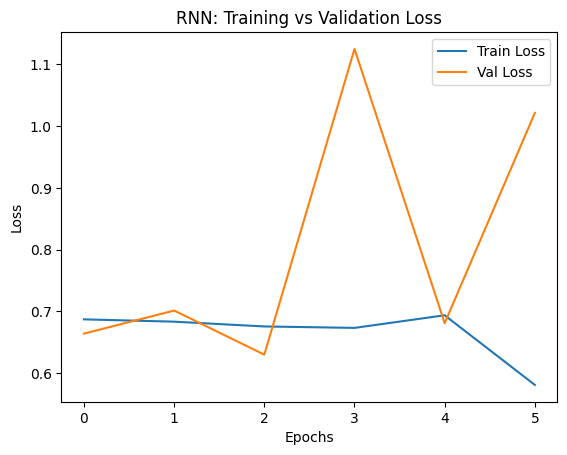

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step

✅ RNN Accuracy: 0.7295

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72      2055
           1       0.69      0.79      0.74      1945

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.74      0.73      0.73      4000


🧩 Confusion Matrix:
[[1375  680]
 [ 402 1543]]


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Model parameters
vocab_size = len(word_index) + 1  # +1 for padding token
embedding_dim = 100
input_length = X_train.shape[1]

# Build the Simple RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
rnn_model.add(SimpleRNN(units=64, return_sequences=False))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_rnn = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)

# Plot training vs validation loss
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.title("RNN: Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate the model
y_pred_rnn = (rnn_model.predict(X_test) > 0.5).astype("int32")

print("\n✅ RNN Accuracy:", accuracy_score(y_test, y_pred_rnn))
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred_rnn))
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rnn))

In [ ]:
LSTM with Trainable Embedding

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 216s 851ms/step - accuracy: 0.5202 - loss: 0.6908 - val_accuracy: 0.5497 - val_loss: 0.6712
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 254s 817ms/step - accuracy: 0.5357 - loss: 0.6681 - val_accuracy: 0.5535 - val_loss: 0.6668
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 259s 804ms/step - accuracy: 0.5451 - loss: 0.6614 - val_accuracy: 0.5795 - val_loss: 0.6635
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 211s 843ms/step - accuracy: 0.8014 - loss: 0.3851 - val_accuracy: 0.9678 - val_loss: 0.1322
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 250s 796ms/step - accuracy: 0.9782 - loss: 0.0786 - val_accuracy: 0.9765 - val_loss: 0.0921
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 211s 834ms/step - accuracy: 0.9899 - loss: 0.0433 - val_accuracy: 0.9772 - val_loss: 0.0901
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 254s 799ms/step - accuracy: 0.9954 - loss: 0.0236 - val_accuracy: 0.9818 - val_loss: 0.0732
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 211s 836ms/step - accuracy: 0.9961 - loss: 0.02

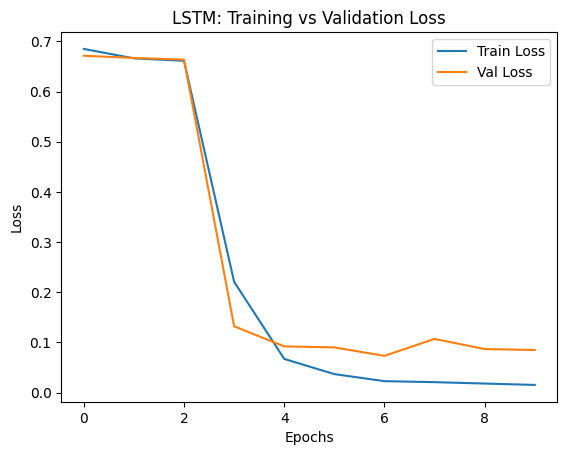

125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step

✅ LSTM Accuracy: 0.98175

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2055
           1       0.98      0.99      0.98      1945

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000


🧩 Confusion Matrix:
[[2010   45]
 [  28 1917]]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Model parameters
vocab_size = len(word_index) + 1
embedding_dim = 100
input_length = X_train.shape[1]

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
lstm_model.add(LSTM(units=64, return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)

# Plot training vs validation loss
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title("LSTM: Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate the model
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

print("\n✅ LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred_lstm))
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))


In [ ]:
LSTM with Pretrained Word2Vec

In [16]:
import gensim.downloader as api
embedding_model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["cleaned_text"])
sequences = tokenizer.texts_to_sequences(df["cleaned_text"])
word_index = tokenizer.word_index

In [18]:
import numpy as np

# Define both variables first
vocab_size = len(word_index) + 1
embedding_dim = 100  # Must match GloVe vector dimension (e.g., 50, 100, 200)

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in embedding_model:
        embedding_vector = embedding_model[word]
        embedding_matrix[i] = embedding_vector

In [19]:
vocab_size = len(word_index) + 1  # total number of tokens
embedding_dim = 100  # must match the dimension of the GloVe you're using


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 120s 472ms/step - accuracy: 0.5853 - loss: 0.6431 - val_accuracy: 0.9025 - val_loss: 0.2967
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 121s 483ms/step - accuracy: 0.6659 - loss: 0.5544 - val_accuracy: 0.9287 - val_loss: 0.2263
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 128s 514ms/step - accuracy: 0.9140 - loss: 0.2789 - val_accuracy: 0.7648 - val_loss: 0.5206
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 128s 514ms/step - accuracy: 0.9025 - loss: 0.3079 - val_accuracy: 0.9262 - val_loss: 0.2330
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 128s 514ms/step - accuracy: 0.9268 - loss: 0.2283 - val_accuracy: 0.9315 - val_loss: 0.2132
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 512ms/step - accuracy: 0.9321 - loss: 0.2125 - val_accuracy: 0.9323 - val_loss: 0.2095
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 510ms/step - accuracy: 0.9324 - loss: 0.2100 - val_accuracy: 0.9355 - val_loss: 0.2051
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 501ms/step - accuracy: 0.9383 -

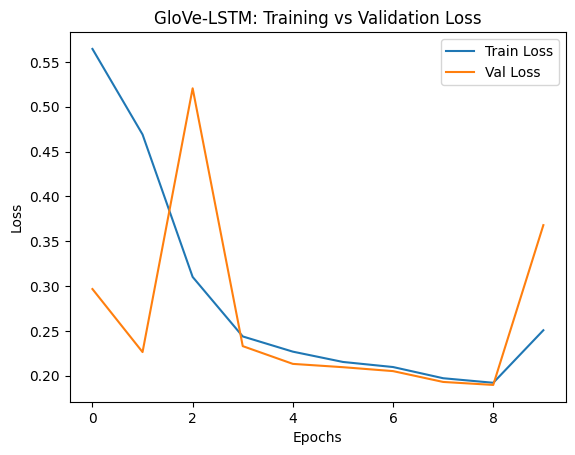

125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step

✅ GloVe-LSTM Accuracy: 0.95475

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2055
           1       0.94      0.97      0.95      1945

    accuracy                           0.95      4000
   macro avg       0.95      0.96      0.95      4000
weighted avg       0.96      0.95      0.95      4000


🧩 Confusion Matrix:
[[1941  114]
 [  67 1878]]


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Build model with pretrained GloVe embeddings
model_glove = Sequential()
model_glove.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=X_train.shape[1],
    trainable=False  # set to True if you want to fine-tune
))
model_glove.add(LSTM(64))
model_glove.add(Dense(1, activation='sigmoid'))

# Compile
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history_glove = model_glove.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)

# Plot loss
plt.plot(history_glove.history['loss'], label='Train Loss')
plt.plot(history_glove.history['val_loss'], label='Val Loss')
plt.title("GloVe-LSTM: Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate
y_pred_glove = (model_glove.predict(X_test) > 0.5).astype("int32")

print("\n✅ GloVe-LSTM Accuracy:", accuracy_score(y_test, y_pred_glove))
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred_glove))
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_glove))


In [21]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.3 MB/s eta 0:00:00


In [22]:
import gradio as gr

# Define prediction function
def classify_news(text):
    cleaned = clean_text(text)  # Use your same preprocessing function
    sequence = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(sequence, maxlen=X_train.shape[1], padding='post')
    prediction = model_glove.predict(padded)[0][0]
    label = "True News" if prediction > 0.5 else "Fake News"
    confidence = f"{prediction:.2f}" if prediction > 0.5 else f"{1 - prediction:.2f}"
    return f"{label} (Confidence: {confidence})"

In [23]:
interface = gr.Interface(
    fn=classify_news,
    inputs=gr.Textbox(lines=4, placeholder="Enter news content here..."),
    outputs="text",
    title="Real-Time News Classifier",
    description="Enter a news headline or paragraph to classify it as Fake or True using an LSTM model with GloVe embeddings."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d1be1aca75e5a45480.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
